In [1]:
# Render plots inline as output 
%matplotlib inline

# global installs for required packages, very common to see these aliased as so
#NOTE: Rerun the complete notebook any time you change the installs
import pandas as pd
import scipy.stats as stats
pd.set_option("display.max_columns", 48)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pl
from datetime import date

#### To Do

(DONE)If I’m a production studio exec and Tom Hanks is starring in my movie but I’m feeling uncertain about whether we should keep him (will he make as much money as we want?), tell me should I keep him in the movie or switch him out for Harrison Ford?

Same as above, but I’m judging on the ratings of the movie instead of the gross/budget.

What’s the probability that a movie’s length will be between 1hr 10mins and 1h 30mins?

How does the distribution of movie budgets compare to the movie gross values?

Which genre trends toward the highest gross-to-budget ratio? You may have to do some extra parsing to answer this question.

Nicolas Cage is known for starring in some pretty bad movies. Are his movies statistically significantly worse (i.e. in rating) than the rest of the IMDB 5000+?

Have any years grossed a statistically-significant higher amount than the other years?


In [2]:
# read in the weather data file with pandas, df is common name for reading in a file
df = pd.read_csv('./imdb.csv')
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.00,English,USA,PG-13,237000000.00,2009.00,936.00,7.90,1.78,33000
1,Color,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.00,English,USA,PG-13,300000000.00,2007.00,5000.00,7.10,2.35,0
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,11000.00,200074175.00,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.00,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.00,English,UK,PG-13,245000000.00,2015.00,393.00,6.80,2.35,85000
3,Color,Christopher Nolan,813.00,164.00,22000.00,23000.00,Christian Bale,27000.00,448130642.00,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.00,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.00,English,USA,PG-13,250000000.00,2012.00,23000.00,8.50,2.35,164000
4,NaN,Doug Walker,nan,nan,131.00,nan,Rob Walker,131.00,nan,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.00,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,nan,NaN,NaN,NaN,nan,nan,12.00,7.10,nan,0


In [3]:
df['profit'] = df['gross'] - df['budget']
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.00,English,USA,PG-13,237000000.00,2009.00,936.00,7.90,1.78,33000,523505847.00
1,Color,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.00,English,USA,PG-13,300000000.00,2007.00,5000.00,7.10,2.35,0,9404152.00
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,11000.00,200074175.00,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.00,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.00,English,UK,PG-13,245000000.00,2015.00,393.00,6.80,2.35,85000,-44925825.00
3,Color,Christopher Nolan,813.00,164.00,22000.00,23000.00,Christian Bale,27000.00,448130642.00,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.00,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.00,English,USA,PG-13,250000000.00,2012.00,23000.00,8.50,2.35,164000,198130642.00
4,NaN,Doug Walker,nan,nan,131.00,nan,Rob Walker,131.00,nan,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.00,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,nan,NaN,NaN,NaN,nan,nan,12.00,7.10,nan,0,nan


In [4]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
count,4993.00,5028.00,4939.00,5020.00,5036.00,4159.00,5043.00,5043.00,5030.00,5022.00,4551.00,4935.00,5030.00,5043.00,4714.00,5043.00,3891.00
mean,140.19,107.20,686.51,645.01,6560.05,48468407.53,83668.16,9699.06,1.37,272.77,39752620.44,2002.47,1651.75,6.44,2.22,7525.96,5844716.96
std,121.60,25.20,2813.33,1665.04,15020.76,68452990.44,138485.26,18163.80,2.01,377.98,206114898.45,12.47,4042.44,1.13,1.39,19320.45,226179411.24
min,1.00,7.00,0.00,0.00,0.00,162.00,5.00,0.00,0.00,1.00,218.00,1916.00,0.00,1.60,1.18,0.00,-12213298588.00
25%,50.00,93.00,7.00,133.00,614.00,5340987.50,8593.50,1411.00,0.00,65.00,6000000.00,1999.00,281.00,5.80,1.85,0.00,-10265176.50
50%,110.00,103.00,49.00,371.50,988.00,25517500.00,34359.00,3090.00,1.00,156.00,20000000.00,2005.00,595.00,6.60,2.35,166.00,851636.00
75%,195.00,118.00,194.50,636.00,11000.00,62309437.50,96309.00,13756.50,2.00,326.00,45000000.00,2011.00,918.00,7.20,2.35,3000.00,24751474.00
max,813.00,511.00,23000.00,23000.00,640000.00,760505847.00,1689764.00,656730.00,43.00,5060.00,12215500000.00,2016.00,137000.00,9.50,16.00,349000.00,523505847.00


### What's the probability that a movie was longer than an hour and a half? Two hours?

In [5]:
two_hour = df[df.duration > 119].count() / df.count()
two_hour['duration']

0.22772474144789182

In [6]:
ninety_min = df[df.duration > 89].count() / df.count()
ninety_min['duration']

0.8424821002386634

#### Answer: 22.77% for >= 120, 84.25% for >= 90

### What's the probability that a movie was directed by Steven Spielberg?

In [7]:
spielberg_direct = df[df.director_name == 'Steven Spielberg'].count()/df.count()
spielberg_direct['director_name']

0.005264223527029763

#### Answer: 0.53%

### What's the probability that a movie directed by Clint Eastwood will gross under budget?

In [8]:
direct = df[df.director_name == 'Clint Eastwood']
eastwood_under = direct[direct.profit < 0].count()/direct.count()
eastwood_under ['profit']

0.3684210526315789

#### Answer: 36.84% of Eastwood movies don't breakeven

### What's the probability that a movie generally grossed more than its budget?

In [9]:
profit = df[df.profit > 0] 
made_green = profit.count()/df.count()
made_green ['profit']

0.5268568491390389

#### Answer: 52.69% of movies make money

### What's the probability that a movie grossed over the average gross of this data set?

In [10]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
count,4993.00,5028.00,4939.00,5020.00,5036.00,4159.00,5043.00,5043.00,5030.00,5022.00,4551.00,4935.00,5030.00,5043.00,4714.00,5043.00,3891.00
mean,140.19,107.20,686.51,645.01,6560.05,48468407.53,83668.16,9699.06,1.37,272.77,39752620.44,2002.47,1651.75,6.44,2.22,7525.96,5844716.96
std,121.60,25.20,2813.33,1665.04,15020.76,68452990.44,138485.26,18163.80,2.01,377.98,206114898.45,12.47,4042.44,1.13,1.39,19320.45,226179411.24
min,1.00,7.00,0.00,0.00,0.00,162.00,5.00,0.00,0.00,1.00,218.00,1916.00,0.00,1.60,1.18,0.00,-12213298588.00
25%,50.00,93.00,7.00,133.00,614.00,5340987.50,8593.50,1411.00,0.00,65.00,6000000.00,1999.00,281.00,5.80,1.85,0.00,-10265176.50
50%,110.00,103.00,49.00,371.50,988.00,25517500.00,34359.00,3090.00,1.00,156.00,20000000.00,2005.00,595.00,6.60,2.35,166.00,851636.00
75%,195.00,118.00,194.50,636.00,11000.00,62309437.50,96309.00,13756.50,2.00,326.00,45000000.00,2011.00,918.00,7.20,2.35,3000.00,24751474.00
max,813.00,511.00,23000.00,23000.00,640000.00,760505847.00,1689764.00,656730.00,43.00,5060.00,12215500000.00,2016.00,137000.00,9.50,16.00,349000.00,523505847.00


In [11]:
# average_revenue = df['gross'].sum()/df.count()
# film_revenue = df['gross']
# beat_average = df[film_revenue > average_revenue].count() / df.count()
# beat_average ['gross']
beat_average = df[df.gross > df.mean()['gross']].count() / df.count()
beat_average['gross']


0.31882664101947583

#### Answer: 31.88% of movies outperform the box office mean

## For ratings we'll consider a movie with at least a 6/10 to be worth renting, if not seeing in theaters. A false positive would be a movie that was highly-rated but did poorly in the box office (gross < budget). A false negative would be a movie that was poorly-rated but did great in the box office (gross < budget).

### In the IMDB dataset, what are the false positive and false negative rates? Can you provide some examples of each?

In [12]:
df[df.imdb_score > 5.9][df.profit < 0].head(3)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,11000.00,200074175.00,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.00,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.00,English,UK,PG-13,245000000.00,2015.00,393.00,6.80,2.35,85000,-44925825.00
5,Color,Andrew Stanton,462.00,132.00,475.00,530.00,Samantha Morton,640.00,73058679.00,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.00,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.00,English,USA,PG-13,263700000.00,2012.00,632.00,6.60,2.35,24000,-190641321.00
7,Color,Nathan Greno,324.00,100.00,15.00,284.00,Donna Murphy,799.00,200807262.00,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.00,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.00,English,USA,PG,260000000.00,2010.00,553.00,7.80,1.85,29000,-59192738.00


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


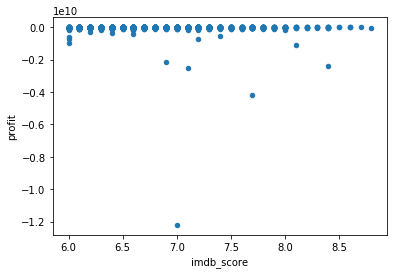

In [13]:
df[df.imdb_score > 5.9][df.profit < 0].plot(x='imdb_score', y='profit', kind='scatter')

In [14]:
false_positive = df[df.imdb_score > 5.9][df.profit < 0].count() / df.count()
false_positive['imdb_score']

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.2429109656950228

In [15]:
df[df.imdb_score < 6.0][df.profit > 0].head(3)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
37,Color,Michael Bay,378.00,165.00,0.00,808.00,Sophia Myles,974.00,245428137.00,Action|Adventure|Sci-Fi,Bingbing Li,Transformers: Age of Extinction,242420,3988,Kelsey Grammer,2.00,blockbuster|bumblebee the character|semi truck...,http://www.imdb.com/title/tt2109248/?ref_=fn_t...,918.00,English,USA,PG-13,210000000.00,2014.00,956.00,5.70,2.35,56000,35428137.00
122,Color,Shawn Levy,185.00,105.00,189.00,1000.00,Rami Malek,49000.00,177243721.00,Adventure|Comedy|Family|Fantasy,Robin Williams,Night at the Museum: Battle of the Smithsonian,130272,54039,Steve Coogan,2.00,hdtv|motorcycle|museum|security guard|tyrannos...,http://www.imdb.com/title/tt1078912/?ref_=fn_t...,209.00,English,USA,PG,150000000.00,2009.00,3000.00,5.90,2.35,2000,27243721.00
174,Color,Bill Condon,322.00,115.00,386.00,12000.00,Kristen Stewart,21000.00,292298923.00,Adventure|Drama|Fantasy|Romance,Robert Pattinson,The Twilight Saga: Breaking Dawn - Part 2,185394,59177,Taylor Lautner,3.00,battle|friend|super strength|vampire|vision,http://www.imdb.com/title/tt1673434/?ref_=fn_t...,329.00,English,USA,PG-13,120000000.00,2012.00,17000.00,5.50,2.35,65000,172298923.00


In [16]:
false_negative = df[df.imdb_score < 6.0][df.profit > 0].count() / df.count()
false_negative['imdb_score']

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.0924053142970454

#### Answer: False Positives make up 24.29% of movies with score of 6.0 and higher
#### Answer: False Negatives make up 9.24% of movies with score below 6.0

### If I’m a production studio exec and Tom Hanks is starring in my movie but I’m feeling uncertain about whether we should keep him (will he make as much money as we want?), tell me should I keep him in the movie or switch him out for Harrison Ford?

In [17]:
tom_hanks = df[df.actor_1_name == 'Tom Hanks']
# pd.DataFrame(tom_hanks['profit'].describe())

In [18]:
mean_tom = np.mean(tom_hanks['profit'])
# mean_tom = tom_hanks['profit'].mean()
standard_tom = np.std(tom_hanks['profit'])
# standard_tom = tom_hanks['profit'].std()
tom_pos_ci = mean_tom + (standard_tom * 2)
tom_neg_ci = mean_tom - (standard_tom * 2)
tom_spread = tom_pos_ci - tom_neg_ci
print tom_pos_ci, tom_neg_ci
tom_spread

247231551.73404422 -116518295.40071091


363749847.13475513

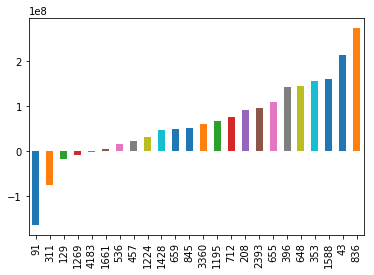

In [19]:
money_tom = tom_hanks['profit'].sort_values()
fit_tom = stats.norm.pdf(money_tom, mean_tom, standard_tom)
# pl.plot(money_tom, fit_tom, '-o')
money_tom.plot(x='profit', y = int, kind='bar')
# pl.xticks([tom_hanks['movie_title']])


In [20]:
perc_profit = tom_hanks[tom_hanks.profit > 0].count()/ tom_hanks.count()
perc_profit['actor_1_name']

0.7916666666666666

##### Harrison Ford

In [21]:
harry_ford = df[df.actor_1_name == 'Harrison Ford']
harry_ford['profit'].describe()

count          25.00
mean     83671166.52
std     122122284.99
min     -48343151.00
25%      -1000000.00
50%      55001343.00
75%     139875760.00
max     449935665.00
Name: profit, dtype: float64

In [22]:
mean_harry = harry_ford['profit'].mean()
standard_harry = harry_ford['profit'].std()
harry_pos_ci = mean_harry + (standard_harry *2)
harry_neg_ci = mean_harry - (standard_harry *2)
harry_spread = harry_pos_ci - harry_neg_ci
print harry_pos_ci, harry_neg_ci
harry_spread

327915736.5038685 -160573403.4638685


488489139.967737

In [23]:
perc_profit = harry_ford[harry_ford.profit > 0].count()/ harry_ford.count()
perc_profit['actor_1_name']

0.6666666666666666

/usr/local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in greater_equal
  return (self.a <= x) & (x <= self.b)
/usr/local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:876: RuntimeWarning: invalid value encountered in less_equal
  return (self.a <= x) & (x <= self.b)


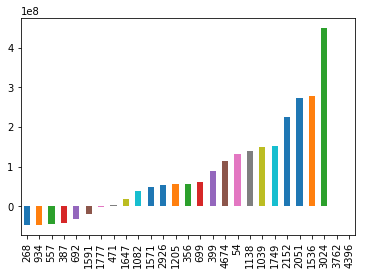

In [24]:
money_harry = harry_ford['profit'].sort_values()
fit_harry = stats.norm.pdf(money_harry, mean_harry, standard_harry)
money_harry.plot(x='profit', y = int, kind='bar')
# pl.xticks([tom_hanks['movie_title']])

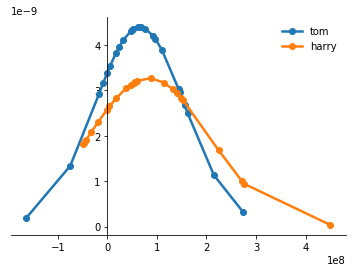

In [25]:
# harry vs tom
disti_tom = pl.plot(money_tom, fit_tom, '-o', linewidth = 2.5, label = 'tom')
disti_harry = pl.plot(money_harry, fit_harry, '-o', linewidth = 2.5, label = 'harry')
pl.legend(loc='upper right', frameon=False)
axis = pl.gca()
axis.spines['right'].set_color('none')
axis.spines['top'].set_color('none')
axis.yaxis.set_ticks_position('left')
axis.spines['left'].set_position(('data',0))


#### Answer: Stick with Tommy

In [26]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.00,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.00,English,USA,PG-13,237000000.00,2009.00,936.00,7.90,1.78,33000,523505847.00
1,Color,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.00,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.00,English,USA,PG-13,300000000.00,2007.00,5000.00,7.10,2.35,0,9404152.00
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,11000.00,200074175.00,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.00,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.00,English,UK,PG-13,245000000.00,2015.00,393.00,6.80,2.35,85000,-44925825.00
3,Color,Christopher Nolan,813.00,164.00,22000.00,23000.00,Christian Bale,27000.00,448130642.00,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.00,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.00,English,USA,PG-13,250000000.00,2012.00,23000.00,8.50,2.35,164000,198130642.00
4,NaN,Doug Walker,nan,nan,131.00,nan,Rob Walker,131.00,nan,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.00,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,nan,NaN,NaN,NaN,nan,nan,12.00,7.10,nan,0,nan
